In [1]:
## Import libraries
import os
import numpy as np
import tensorflow as tf
import scipy.io # used to convert matlab arrays to numpy ones
import h5py # used to convert matlab arrays to numpy ones
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
# Load the .mat file
path = '../../flat_dataset/'
mat_data1 = scipy.io.loadmat(path+'testset.mat')
mat_data3 = scipy.io.loadmat(path+'testtarget.mat')
mat_data4 = scipy.io.loadmat(path+'traintarget.mat')


with h5py.File(path+'trainset.mat', 'r') as file:
    # Access and work with the data in the file
    dataset = file['trainset']  # Replace with the actual dataset name
    # Convert the dataset to a NumPy array
    numpy_trainset = dataset[()]


# Extract the 4D array from the loaded data
testset = mat_data1['testset']  # Replace 'your_matlab_variable_name' with the actual variable name
testtarget = mat_data3['testtarget']
traintarget = mat_data4['traintarget']

# Convert the MATLAB 4D double array to a NumPy array
numpy_testset = np.array(testset)
numpy_testtarget = np.array(testtarget)
numpy_traintarget = np.array(traintarget)



# Now you can work with 'numpy_4d_array' as a NumPy array

train_examples = np.squeeze(numpy_trainset, axis=1)
train_labels = np.squeeze(numpy_traintarget, axis=0)
test_examples = np.squeeze(numpy_testset, axis=2)
test_labels = np.squeeze(numpy_testtarget, axis=0)


#train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
#test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

#print(type(train_dataset))

#BATCH_SIZE = 32
#SHUFFLE_BUFFER_SIZE = 100

# train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
#train_dataset = train_dataset.batch(BATCH_SIZE)
#test_dataset = test_dataset.batch(BATCH_SIZE)


#print(type(train_dataset))


In [3]:
#train_examples = np.squeeze(numpy_trainset, axis=2).transpose(2,0,1)
print(train_examples.shape)
print(test_examples.shape)

train_examples_mod=train_examples.transpose(0,2,1)
test_examples_mod=test_examples.transpose(2,0,1)

print(train_examples_mod.shape)
print(test_examples_mod.shape)

(39588, 96, 96)
(96, 96, 6987)
(39588, 96, 96)
(6987, 96, 96)


[1 1 0 0 0 0 0 0 1 0]


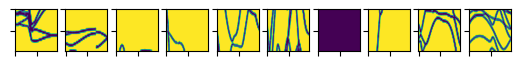

[1 0 1 0 0 0 0 1 0 1]


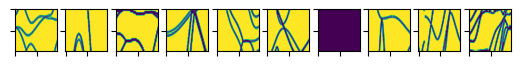

In [4]:
import matplotlib.pyplot as plt

startnum=40
num=10
fig,ax = plt.subplots(1,num)
print(train_labels[startnum:(startnum+num)])
for item in range(0,num):
  ax[item].imshow(train_examples_mod[item+startnum])
  ax[item].set_yticklabels([])
  ax[item].set_xticklabels([])
plt.show()


num1=10
fig1,ax1 = plt.subplots(1,num1)
print(test_labels[startnum:(startnum+num1)])
for item in range(0,num1):
  ax1[item].imshow(test_examples_mod[item+startnum])
  ax1[item].set_yticklabels([])
  ax1[item].set_xticklabels([])
plt.show()

In [5]:
print(train_examples.shape, train_labels.shape)
print(test_examples.shape, test_labels.shape)
print(train_labels[0:5])

(39588, 96, 96) (39588,)
(96, 96, 6987) (6987,)
[0 0 0 0 0]


In [8]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(30, (3, 3), input_shape=(96,96,1)),
#     tf.keras.layers.Conv2D(12, (3, 3), input_shape=(96,96,1)),
#     tf.keras.layers.Dense(80,),
#     tf.keras.layers.Dense(1)
# ])

#model11 = tf.keras.Sequential([
#    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)),
#    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
#    tf.keras.layers.MaxPooling2D((2, 2)),
#    tf.keras.layers.Dense(8, activation='sigmoid'),
#    tf.keras.layers.Dense(1, activation='softmax')
#])

#plot_model(model,to_file='model1.png',show_shapes=True,show_layer_names=True)
filters1 = 30
filters2 = 12
kernel_size1  = (10,10)
kernel_size2  = (3,3)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters1, kernel_size1, activation = 'sigmoid', input_shape=(96, 96,1)),
    tf.keras.layers.Conv2D(filters2, kernel_size2),
    tf.keras.layers.Dense(80, activation='sigmoid'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
 ])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=2e-4), 
              loss='binary_crossentropy',   # Use 'sparse_categorical_crossentropy' for integer labels
              metrics=['accuracy'])
model.summary()
# model.compile(optimizer=tf.keras.optimizers.RMSprop(),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['sparse_categorical_accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 87, 87, 30)        3030      
                                                                 
 conv2d_5 (Conv2D)           (None, 85, 85, 12)        3252      
                                                                 
 dense_6 (Dense)             (None, 85, 85, 80)        1040      
                                                                 
 global_max_pooling2d_2 (Glo  (None, 80)               0         
 balMaxPooling2D)                                                
                                                                 
 dense_7 (Dense)             (None, 128)               10368     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                      

In [13]:
history= model.fit(train_examples_mod, train_labels, epochs=20, batch_size=128, validation_data = (test_examples_mod, test_labels), verbose =1)

model.save(path+'model_9feb_2024')

#model.evaluate(test_dataset)

Epoch 1/20
  7/310 [..............................] - ETA: 13:09 - loss: 0.2004 - accuracy: 0.9141

KeyboardInterrupt: 

In [16]:
model.save(path+'model.keras')
model.save(path+'model_new')

INFO:tensorflow:Assets written to: ../flat_dataset/model_new\assets


INFO:tensorflow:Assets written to: ../flat_dataset/model_new\assets


In [12]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

NameError: name 'history' is not defined

In [11]:
model.evaluate(test_examples_mod,test_labels)

219/219 [==============================] - 8s 34ms/step - loss: 0.1904 - accuracy: 0.9171


[0.1904473453760147, 0.9171318411827087]